Imports and set pandas dataframe display options:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import display
from html.parser import HTMLParser
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import collections
import seaborn as sns
from nltk.util import ngrams

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Load the scraped data and have a cursory look:

In [2]:
df = pd.read_csv("porvoo_listings.csv")
display(df.head())
display(df.describe())

,Unnamed: 0,Sijainti,Kaupunginosa,Kohdenumero,Kerros,Asuinpinta-ala,Tontin pinta-ala,Kokonaispinta-ala,Pinta-alojen lisätiedot,Huoneiston kokoonpano,Huoneita,Kunto,Lisätietoa vapautumisesta,Keittiön varusteet,Parveke,Parvekkeen lisätiedot,Kylpyhuoneen varusteet,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Asunnossa sauna,Saunan lisätiedot,Asumistyyppi,Palvelut,Kohde on,Velaton hinta,Myyntihinta,Neliöhinta,Hoitovastike,Yhtiövastike,Vesimaksu,Vesimaksun lisätiedot,Pysäköintimaksu,Uudiskohde,Taloyhtiön nimi,Rakennuksen tyyppi,Rakennusvuosi,Huoneistojen lukumäärä,Kerroksia,Hissi,Rakennusmateriaali,Kattomateriaali,Kattotyyppi,Energialuokka,Energiatodistus,Kiinteistön antennijärjestelmä,Tontin koko,Tontin omistus,Kiinteistönhoito,Isännöinti,Kaavoitustiedot,Kaavatilanne,Lämmitys,Lisätietoja talosta,Pysäköintitilan kuvaus,Yhteiset tilat,Pintamateriaalit,Kuvaus,Pinta-alan lähde,Postitoimipaikka,Linkit,Keskimääräinen sähkönkulutus,Rakennuksen käyttöönottovuosi,Taloyhtiössä on sauna,Kunnallistekniikka,Ilmanvaihto,Maasto,Kunnon lisätiedot,Rannan omistus,Kiinteistötunnus,Kiinnitykset,Lämmityskustannukset,Muut kustannukset,Kiinteistövero,Maanvuokraaja,Liikenneyhteydet,Lisätietoa rakennusoikeudesta,Kuntotutkimus,Tontin vuokra päättyy,Tontin vuokra,Muut tilat,Viemäröinti,Lunastuspykälä,Liiketilojen pinta-ala,Liikehuoneistojen lukumäärä,Lisätietoja makuuhuoneen varusteista,Olohuoneen varusteet,Muut materiaalit,Makuuhuoneen lattia,Makuuhuoneen seinät,Olohuoneen lattia,Olohuoneen seinät,Lisätiedot,Vuokrattu,Julkisivuremontti,Perustus,Rakennusoikeus,Lainaosuuden maksu,Velkaosuus,Rahoitusvastike,Saunan kustannukset,Kerroksien lukumäärä,Terassin kuvaus,Ikkunoiden suunta,Rannan (vesistön) tyyppi,Tietoliikennepalvelut,Tilan nimi,Tontin kuvaus,Rasitteet ja oikeudet,Käyttövesi,Lisätietoa taloyhtiöstä,Kattoremontti,Putkiremontti,Uudiskohteen tila,Ajo-ohjeet,Keittiö,Kylpyhuoneen remontit,Keittiön remontit,Muut remontit,Osakeluettelo on siirretty huoneistojärjestelmään,Sähköinen omistajamerkintä,TV-palvelut,Vuokratulo,Liikehuoneistojen pinta-ala,Lisätietoa hissistä,Lisätietoa taloyhtiön saunasta,Kiinteistön laajakaistayhteys,Harrastusmahdollisuudet,Rungon rakennustapa,Keittiön lattia,Keittiön seinä,Kylpyhuoneen lattia,Kylpyhuoneen seinät,Ominaisuudet,Vesi ja jätevesi,Vapautuu,Ensiesittelyssä,Tontin vuokravastike,Vuokratontin lunastusosuus,Kunnan numero,Kerroksen lisätiedot,Puhtaanapito,Ilmansuunnat,Tiedustelut,Vuokra-aika,Rakennusvuoden lisätiedot,Muut rakennukset,Pihan kuvaus,Kerrosala,Uusin kirjallinen tarjous,Autopaikan kustannukset,Rannan kuvaus,Tiemaksut,Sähkömaksu,Soveltuvuus liikuntaesteisille,Taloyhtiön tilat ja tuotot,Korjausvastike,Saunamaksu,Valmistumisaika,Rannan pituus,Varaustilanne,Rannan suunta,Pihan ilmansuunnat,Alueen kuvaus,Vesistö
0,0,"<a href=""/myytavat-asunnot?locations=%5B%22Pur...","<a href=""/myytavat-asunnot/porvoo/gammelbacka""...",9947991,2 / 2,93 m²,"1,05 ha",98 m²,"yhtiöjärjestyksen mukainen, isännöitsijäntodis...","4h, k, kph, s, parveke, et, varasto",4.0,Tyydyttävä,heti,"Liesi: leivinuuni, induktio. Työtasot: kivi. K...",Kyllä,Tyyppi: ulostyönnetty. Suunta: länsi,"Varustus: suihkuseinä, pesukoneliitäntä, latti...",ulkovarasto,Näkymät parvekkeelta ja alakerran olohuoneesta...,"2021 Remontti, Terassiovet, kunnostus tarvitta...","HUONEISTOSSA: 2020 Jääkaappi, pakastin ja tisk...",Kyllä,sähkökiuas,Omistus,Palvelut: K-market Gammelbacka n. 500m.\nPosti...,Osakehuoneisto,219&nbsp;210&nbsp;€,219&nbsp;210&nbsp;€,"2&nbsp;357,10&nbsp;€ / m<sup>2</sup>","334,49&nbsp;€ / kk","334,49&nbsp;€ / kk",20&nbsp;€ / kk,henkilöluvun mukaan,6.5 e / kk,Ei,As Oy Porvoon MLK:n Puistorivi,Rivitalo,1995.0,28.0,2.0,Ei,betoni,Tiilikate,Harjakatto,F2013 Viimeinen voimassaolopäivä 08.01.2025.,Kyllä,kaapeli-tv,"1,05 ha",Oma,huoltoyhtiö. Kiinteistönhoidon lisätiedot: PMH...,Frank Wendelin / REIM Porvoo Oy\n0207438381\nf...,Voimassa oleva asemakaava.\n\nLisätietoja anta...,Asemakaava,muu,"<a href=""https://asunnot.oikotie.fi/talo/purok...",sähköpis

,Unnamed: 0,Huoneita,Rakennusvuosi,Huoneistojen lukumäärä,Kerroksia,Rakennuksen käyttöönottovuosi,Liikehuoneistojen lukumäärä,Kerroksien lukumäärä,Putkiremontti,Kunnan numero
count,301.000000,298.000000,289.000000,204.000000,227.000000,54.000000,53.000000,19.000000,2.000000,11.0
mean,150.000000,3.161074,1997.166090,36.308824,3.030837,1984.796296,1.396226,2.105263,2013.000000,638.0
std,87.035433,1.606247,34.675982,40.376037,1.775926,26.178905,2.364315,0.567131,8.485281,0.0
min,0.000000,0.000000,1804.000000,2.000000,1.000000,1899.000000,0.000000,1.000000,2007.000000,638.0
25%,75.000000,2.000000,1976.000000,24.000000,2.000000,1973.250000,0.000000,2.000000,2010.000000,638.0
50%,150.000000,3.000000,2017.000000,31.000000,2.000000,1981.500000,1.000000,2.000000,2013.000000,638.0
75%,225.000000,4.000000,2022.000000,37.250000,4.000000,2009.500000,1.000000,2.000000,2016.000000,638.0
max,300.000000,10.000000,2023.000000,388.000000,8.000000,2022.000000,10.000000,3.000000,2019.000000,638.0


First we tackle the columns with html tags:

In [3]:
#Define MyHTMLParser with the functionality of appending found data into a string
class MyHTMLParser(HTMLParser):
    def __init__(self):
      super().__init__()
      self.string = ''
    def handle_data(self, data):
      self.string += data
#This function creates an instance of MyHTMLParser and returns the string made out of the data portions of the html
def parse(html : str) -> str:
    parser = MyHTMLParser()
    parser.feed(html)
    return parser.string

df['Sijainti'] = df['Sijainti'].apply(parse)
df['Myyntihinta'] = df['Myyntihinta'].apply(parse)
#Kaupunginosa column contains a few NaN values
df['Kaupunginosa'] = df['Kaupunginosa'].apply(lambda x: parse(x) if pd.notna(x) else x)
display(df.head())

,Unnamed: 0,Sijainti,Kaupunginosa,Kohdenumero,Kerros,Asuinpinta-ala,Tontin pinta-ala,Kokonaispinta-ala,Pinta-alojen lisätiedot,Huoneiston kokoonpano,Huoneita,Kunto,Lisätietoa vapautumisesta,Keittiön varusteet,Parveke,Parvekkeen lisätiedot,Kylpyhuoneen varusteet,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Asunnossa sauna,Saunan lisätiedot,Asumistyyppi,Palvelut,Kohde on,Velaton hinta,Myyntihinta,Neliöhinta,Hoitovastike,Yhtiövastike,Vesimaksu,Vesimaksun lisätiedot,Pysäköintimaksu,Uudiskohde,Taloyhtiön nimi,Rakennuksen tyyppi,Rakennusvuosi,Huoneistojen lukumäärä,Kerroksia,Hissi,Rakennusmateriaali,Kattomateriaali,Kattotyyppi,Energialuokka,Energiatodistus,Kiinteistön antennijärjestelmä,Tontin koko,Tontin omistus,Kiinteistönhoito,Isännöinti,Kaavoitustiedot,Kaavatilanne,Lämmitys,Lisätietoja talosta,Pysäköintitilan kuvaus,Yhteiset tilat,Pintamateriaalit,Kuvaus,Pinta-alan lähde,Postitoimipaikka,Linkit,Keskimääräinen sähkönkulutus,Rakennuksen käyttöönottovuosi,Taloyhtiössä on sauna,Kunnallistekniikka,Ilmanvaihto,Maasto,Kunnon lisätiedot,Rannan omistus,Kiinteistötunnus,Kiinnitykset,Lämmityskustannukset,Muut kustannukset,Kiinteistövero,Maanvuokraaja,Liikenneyhteydet,Lisätietoa rakennusoikeudesta,Kuntotutkimus,Tontin vuokra päättyy,Tontin vuokra,Muut tilat,Viemäröinti,Lunastuspykälä,Liiketilojen pinta-ala,Liikehuoneistojen lukumäärä,Lisätietoja makuuhuoneen varusteista,Olohuoneen varusteet,Muut materiaalit,Makuuhuoneen lattia,Makuuhuoneen seinät,Olohuoneen lattia,Olohuoneen seinät,Lisätiedot,Vuokrattu,Julkisivuremontti,Perustus,Rakennusoikeus,Lainaosuuden maksu,Velkaosuus,Rahoitusvastike,Saunan kustannukset,Kerroksien lukumäärä,Terassin kuvaus,Ikkunoiden suunta,Rannan (vesistön) tyyppi,Tietoliikennepalvelut,Tilan nimi,Tontin kuvaus,Rasitteet ja oikeudet,Käyttövesi,Lisätietoa taloyhtiöstä,Kattoremontti,Putkiremontti,Uudiskohteen tila,Ajo-ohjeet,Keittiö,Kylpyhuoneen remontit,Keittiön remontit,Muut remontit,Osakeluettelo on siirretty huoneistojärjestelmään,Sähköinen omistajamerkintä,TV-palvelut,Vuokratulo,Liikehuoneistojen pinta-ala,Lisätietoa hissistä,Lisätietoa taloyhtiön saunasta,Kiinteistön laajakaistayhteys,Harrastusmahdollisuudet,Rungon rakennustapa,Keittiön lattia,Keittiön seinä,Kylpyhuoneen lattia,Kylpyhuoneen seinät,Ominaisuudet,Vesi ja jätevesi,Vapautuu,Ensiesittelyssä,Tontin vuokravastike,Vuokratontin lunastusosuus,Kunnan numero,Kerroksen lisätiedot,Puhtaanapito,Ilmansuunnat,Tiedustelut,Vuokra-aika,Rakennusvuoden lisätiedot,Muut rakennukset,Pihan kuvaus,Kerrosala,Uusin kirjallinen tarjous,Autopaikan kustannukset,Rannan kuvaus,Tiemaksut,Sähkömaksu,Soveltuvuus liikuntaesteisille,Taloyhtiön tilat ja tuotot,Korjausvastike,Saunamaksu,Valmistumisaika,Rannan pituus,Varaustilanne,Rannan suunta,Pihan ilmansuunnat,Alueen kuvaus,Vesistö
0,0,"Purokatu 10 C, 06400 Porvoo",Gammelbacka,9947991,2 / 2,93 m²,"1,05 ha",98 m²,"yhtiöjärjestyksen mukainen, isännöitsijäntodis...","4h, k, kph, s, parveke, et, varasto",4.0,Tyydyttävä,heti,"Liesi: leivinuuni, induktio. Työtasot: kivi. K...",Kyllä,Tyyppi: ulostyönnetty. Suunta: länsi,"Varustus: suihkuseinä, pesukoneliitäntä, latti...",ulkovarasto,Näkymät parvekkeelta ja alakerran olohuoneesta...,"2021 Remontti, Terassiovet, kunnostus tarvitta...","HUONEISTOSSA: 2020 Jääkaappi, pakastin ja tisk...",Kyllä,sähkökiuas,Omistus,Palvelut: K-market Gammelbacka n. 500m.\nPosti...,Osakehuoneisto,219&nbsp;210&nbsp;€,219 210 €,"2&nbsp;357,10&nbsp;€ / m<sup>2</sup>","334,49&nbsp;€ / kk","334,49&nbsp;€ / kk",20&nbsp;€ / kk,henkilöluvun mukaan,6.5 e / kk,Ei,As Oy Porvoon MLK:n Puistorivi,Rivitalo,1995.0,28.0,2.0,Ei,betoni,Tiilikate,Harjakatto,F2013 Viimeinen voimassaolopäivä 08.01.2025.,Kyllä,kaapeli-tv,"1,05 ha",Oma,huoltoyhtiö. Kiinteistönhoidon lisätiedot: PMH...,Frank Wendelin / REIM Porvoo Oy\n0207438381\nf...,Voimassa oleva asemakaava.\n\nLisätietoja anta...,Asemakaava,muu,"<a href=""https://asunnot.oikotie.fi/talo/purok...",sähköpistokkeita: 32.,kaapeli-tv. Taloyhtiössä muuta: Lämmönjakotapa...,Lattia: Kei

Clean column values related to pricing and square meters:

In [4]:
#Columns containing values related to pricing
hinnat = ["Velaton hinta", "Myyntihinta", "Neliöhinta", "Hoitovastike", "Yhtiövastike", "Vesimaksu", "Velkaosuus", "Rahoitusvastike", "Saunan kustannukset", "Autopaikan kustannukset", "Kiinteistövero"]
pinta_alat = ["Asuinpinta-ala", "Tontin pinta-ala", "Kokonaispinta-ala", "Tontin koko", "Liiketilojen pinta-ala"]

#Strip string &nbsp; and \xa0 from all column values 
df = df.apply(lambda hinta: hinta.str.replace('&nbsp;', '') if hinta.name in hinnat else hinta)
df = df.apply(lambda hinta: hinta.str.replace("\\xa0","", regex=True) if hinta.name in hinnat else hinta)
df = df.apply(lambda hinta: hinta.str.replace("noin","") if hinta.name in hinnat else hinta)

#Replace <sup>2</sup> with latex superscript $^2$
df['Neliöhinta'] = df['Neliöhinta'].str.replace('<sup>2</sup>', '$^2$')
#Clean area related values
df[pinta_alat] = df[pinta_alat].apply(lambda x: x.str.replace("m²", ""))
df[pinta_alat] = df[pinta_alat].apply(lambda x: x.str.replace("ha", ""))
df[pinta_alat] = df[pinta_alat].apply(lambda x: x.str.replace("m2.", "", regex = False))

#Remove units from values and convert them to floats
for hinta in hinnat:
#df[hinta] = df[hinta].apply(lambda x: float(x.split(sep, 1)[0].replace(',', '.')) if pd.notna(x) and x != 'Kysy hintaa' else np.NaN) 
    df[hinta] = df[hinta].apply(lambda x: float(re.split(r'[(\u20AC)e]', x)[0].replace(',', '.')) if pd.notna(x) and x != 'Kysy hintaa' and x != "Ei vielä määrätty" and x != "Uusimaa" and x != "Finland" else np.NaN)
for pinta_ala in pinta_alat:
    df[pinta_ala] = df[pinta_ala].apply(lambda x: float(x.replace(' ', '').replace(',', '.')) if type(x) != float else np.NaN)
#Check cleaned columns    
display(df.head())
display(df[hinnat].head())
display(df[pinta_alat].head())
display(df.describe())

,Unnamed: 0,Sijainti,Kaupunginosa,Kohdenumero,Kerros,Asuinpinta-ala,Tontin pinta-ala,Kokonaispinta-ala,Pinta-alojen lisätiedot,Huoneiston kokoonpano,Huoneita,Kunto,Lisätietoa vapautumisesta,Keittiön varusteet,Parveke,Parvekkeen lisätiedot,Kylpyhuoneen varusteet,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit,Asunnossa sauna,Saunan lisätiedot,Asumistyyppi,Palvelut,Kohde on,Velaton hinta,Myyntihinta,Neliöhinta,Hoitovastike,Yhtiövastike,Vesimaksu,Vesimaksun lisätiedot,Pysäköintimaksu,Uudiskohde,Taloyhtiön nimi,Rakennuksen tyyppi,Rakennusvuosi,Huoneistojen lukumäärä,Kerroksia,Hissi,Rakennusmateriaali,Kattomateriaali,Kattotyyppi,Energialuokka,Energiatodistus,Kiinteistön antennijärjestelmä,Tontin koko,Tontin omistus,Kiinteistönhoito,Isännöinti,Kaavoitustiedot,Kaavatilanne,Lämmitys,Lisätietoja talosta,Pysäköintitilan kuvaus,Yhteiset tilat,Pintamateriaalit,Kuvaus,Pinta-alan lähde,Postitoimipaikka,Linkit,Keskimääräinen sähkönkulutus,Rakennuksen käyttöönottovuosi,Taloyhtiössä on sauna,Kunnallistekniikka,Ilmanvaihto,Maasto,Kunnon lisätiedot,Rannan omistus,Kiinteistötunnus,Kiinnitykset,Lämmityskustannukset,Muut kustannukset,Kiinteistövero,Maanvuokraaja,Liikenneyhteydet,Lisätietoa rakennusoikeudesta,Kuntotutkimus,Tontin vuokra päättyy,Tontin vuokra,Muut tilat,Viemäröinti,Lunastuspykälä,Liiketilojen pinta-ala,Liikehuoneistojen lukumäärä,Lisätietoja makuuhuoneen varusteista,Olohuoneen varusteet,Muut materiaalit,Makuuhuoneen lattia,Makuuhuoneen seinät,Olohuoneen lattia,Olohuoneen seinät,Lisätiedot,Vuokrattu,Julkisivuremontti,Perustus,Rakennusoikeus,Lainaosuuden maksu,Velkaosuus,Rahoitusvastike,Saunan kustannukset,Kerroksien lukumäärä,Terassin kuvaus,Ikkunoiden suunta,Rannan (vesistön) tyyppi,Tietoliikennepalvelut,Tilan nimi,Tontin kuvaus,Rasitteet ja oikeudet,Käyttövesi,Lisätietoa taloyhtiöstä,Kattoremontti,Putkiremontti,Uudiskohteen tila,Ajo-ohjeet,Keittiö,Kylpyhuoneen remontit,Keittiön remontit,Muut remontit,Osakeluettelo on siirretty huoneistojärjestelmään,Sähköinen omistajamerkintä,TV-palvelut,Vuokratulo,Liikehuoneistojen pinta-ala,Lisätietoa hissistä,Lisätietoa taloyhtiön saunasta,Kiinteistön laajakaistayhteys,Harrastusmahdollisuudet,Rungon rakennustapa,Keittiön lattia,Keittiön seinä,Kylpyhuoneen lattia,Kylpyhuoneen seinät,Ominaisuudet,Vesi ja jätevesi,Vapautuu,Ensiesittelyssä,Tontin vuokravastike,Vuokratontin lunastusosuus,Kunnan numero,Kerroksen lisätiedot,Puhtaanapito,Ilmansuunnat,Tiedustelut,Vuokra-aika,Rakennusvuoden lisätiedot,Muut rakennukset,Pihan kuvaus,Kerrosala,Uusin kirjallinen tarjous,Autopaikan kustannukset,Rannan kuvaus,Tiemaksut,Sähkömaksu,Soveltuvuus liikuntaesteisille,Taloyhtiön tilat ja tuotot,Korjausvastike,Saunamaksu,Valmistumisaika,Rannan pituus,Varaustilanne,Rannan suunta,Pihan ilmansuunnat,Alueen kuvaus,Vesistö
0,0,"Purokatu 10 C, 06400 Porvoo",Gammelbacka,9947991,2 / 2,93.0,1.05,98.0,"yhtiöjärjestyksen mukainen, isännöitsijäntodis...","4h, k, kph, s, parveke, et, varasto",4.0,Tyydyttävä,heti,"Liesi: leivinuuni, induktio. Työtasot: kivi. K...",Kyllä,Tyyppi: ulostyönnetty. Suunta: länsi,"Varustus: suihkuseinä, pesukoneliitäntä, latti...",ulkovarasto,Näkymät parvekkeelta ja alakerran olohuoneesta...,"2021 Remontti, Terassiovet, kunnostus tarvitta...","HUONEISTOSSA: 2020 Jääkaappi, pakastin ja tisk...",Kyllä,sähkökiuas,Omistus,Palvelut: K-market Gammelbacka n. 500m.\nPosti...,Osakehuoneisto,219210.0,219210.0,2357.10,334.49,334.49,20.0,henkilöluvun mukaan,6.5 e / kk,Ei,As Oy Porvoon MLK:n Puistorivi,Rivitalo,1995.0,28.0,2.0,Ei,betoni,Tiilikate,Harjakatto,F2013 Viimeinen voimassaolopäivä 08.01.2025.,Kyllä,kaapeli-tv,1.05,Oma,huoltoyhtiö. Kiinteistönhoidon lisätiedot: PMH...,Frank Wendelin / REIM Porvoo Oy\n0207438381\nf...,Voimassa oleva asemakaava.\n\nLisätietoja anta...,Asemakaava,muu,"<a href=""https://asunnot.oikotie.fi/talo/purok...",sähköpistokkeita: 32.,kaapeli-tv. Taloyhtiössä muuta: Lämmönjakotapa...,Lattia: Keittiössä: laminaatti. Pesutiloissa: ...,Nyt myyntiin tilava koko perheen rivitaloasunt...,NaN,

,Velaton hinta,Myyntihinta,Neliöhinta,Hoitovastike,Yhtiövastike,Vesimaksu,Velkaosuus,Rahoitusvastike,Saunan kustannukset,Autopaikan kustannukset,Kiinteistövero
0,219210.0,219210.0,2357.10,334.49,334.49,20.0,NaN,NaN,NaN,NaN,NaN
1,189000.0,189000.0,2554.05,280.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,198000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0
3,329000.0,329000.0,3427.08,336.00,336.00,21.0,NaN,NaN,NaN,NaN,NaN
4,118000.0,118000.0,2718.89,177.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Asuinpinta-ala,Tontin pinta-ala,Kokonaispinta-ala,Tontin koko,Liiketilojen pinta-ala
0,93.0,1.05,98.0,1.05,NaN
1,74.0,1979.00,74.0,1979.00,NaN
2,101.0,661.00,119.0,661.00,NaN
3,96.0,5563.00,96.0,5563.00,0.0
4,43.4,1450.00,43.4,1450.00,NaN


,Unnamed: 0,Asuinpinta-ala,Tontin pinta-ala,Kokonaispinta-ala,Huoneita,Velaton hinta,Myyntihinta,Neliöhinta,Hoitovastike,Yhtiövastike,Vesimaksu,Rakennusvuosi,Huoneistojen lukumäärä,Kerroksia,Tontin koko,Rakennuksen käyttöönottovuosi,Kiinteistövero,Liiketilojen pinta-ala,Liikehuoneistojen lukumäärä,Velkaosuus,Rahoitusvastike,Saunan kustannukset,Kerroksien lukumäärä,Putkiremontti,Kunnan numero,Autopaikan kustannukset
count,301.000000,301.000000,250.000000,285.000000,298.000000,228.000000,3.000000e+02,228.000000,217.000000,209.000000,157.000000,289.000000,204.000000,227.000000,250.000000,54.000000,60.000000,29.000000,53.000000,97.000000,163.000000,22.000000,19.000000,2.000000,11.0,12.000000
mean,150.000000,89.806645,2316.735440,109.129123,3.161074,238246.307018,2.070461e+05,3864.933684,227.482166,427.419234,20.453248,1997.166090,36.308824,3.030837,2316.735440,1984.796296,532.836500,223.586207,1.396226,106707.708351,245.842577,10.863636,2.105263,2013.000000,638.0,11.333333
std,87.035433,82.859842,2086.107139,130.410484,1.606247,108449.901900,2.304425e+05,1212.754485,110.815982,248.714990,12.025034,34.675982,40.376037,1.775926,2086.107139,26.178905,432.848585,479.105567,2.364315,71527.343729,218.424495,4.601195,0.567131,8.485281,0.0,4.830459
min,0.000000,0.000000,1.000000,23.500000,0.000000,45000.000000,3.221400e+04,1237.110000,0.000000,0.000000,0.000000,1804.000000,2.000000,1.000000,1.000000,1899.000000,108.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2007.000000,638.0,4.000000
25%,75.000000,47.500000,905.000000,48.500000,2.000000,165000.000000,8.273924e+04,3004.675000,159.800000,244.700000,19.000000,1976.000000,24.000000,2.000000,905.000000,1973.250000,305.592500,0.000000,0.000000,12994.380000,94.580000,8.000000,2.000000,2010.000000,638.0,10.000000
50%,150.000000,68.000000,1267.000000,69.000000,3.000000,218150.000000,1.352138e+05,3974.655000,209.380000,369.400000,20.000000,2017.000000,31.000000,2.000000,1267.000000,1981.500000,445.045000,38.000000,1.000000,115430.000000,174.230000,10.000000,2.000000,2013.000000,638.0,10.000000
75%,225.000000,102.000000,3560.000000,123.000000,4.000000,297700.000000,2.425000e+05,4760.465000,268.550000,554.000000,20.000000,2022.000000,37.250000,4.000000,3560.000000,2009.500000,607.732500,162.500000,1.000000,167720.000000,368.675000,14.000000,2.000000,2016.000000,638.0,12.000000
max,300.000000,900.000000,9987.000000,1470.000000,10.000000,811000.000000,2.390000e+06,6767.860000,981.000000,1293.600000,125.000000,2023.000000,388.000000,8.000000,9987.000000,2022.000000,3008.540000,2231.000000,10.000000,224261.910000,1016.400000,20.000000,3.000000,2019.000000,638.0,24.000000


Analysis of used vocabulary in listing descriptions

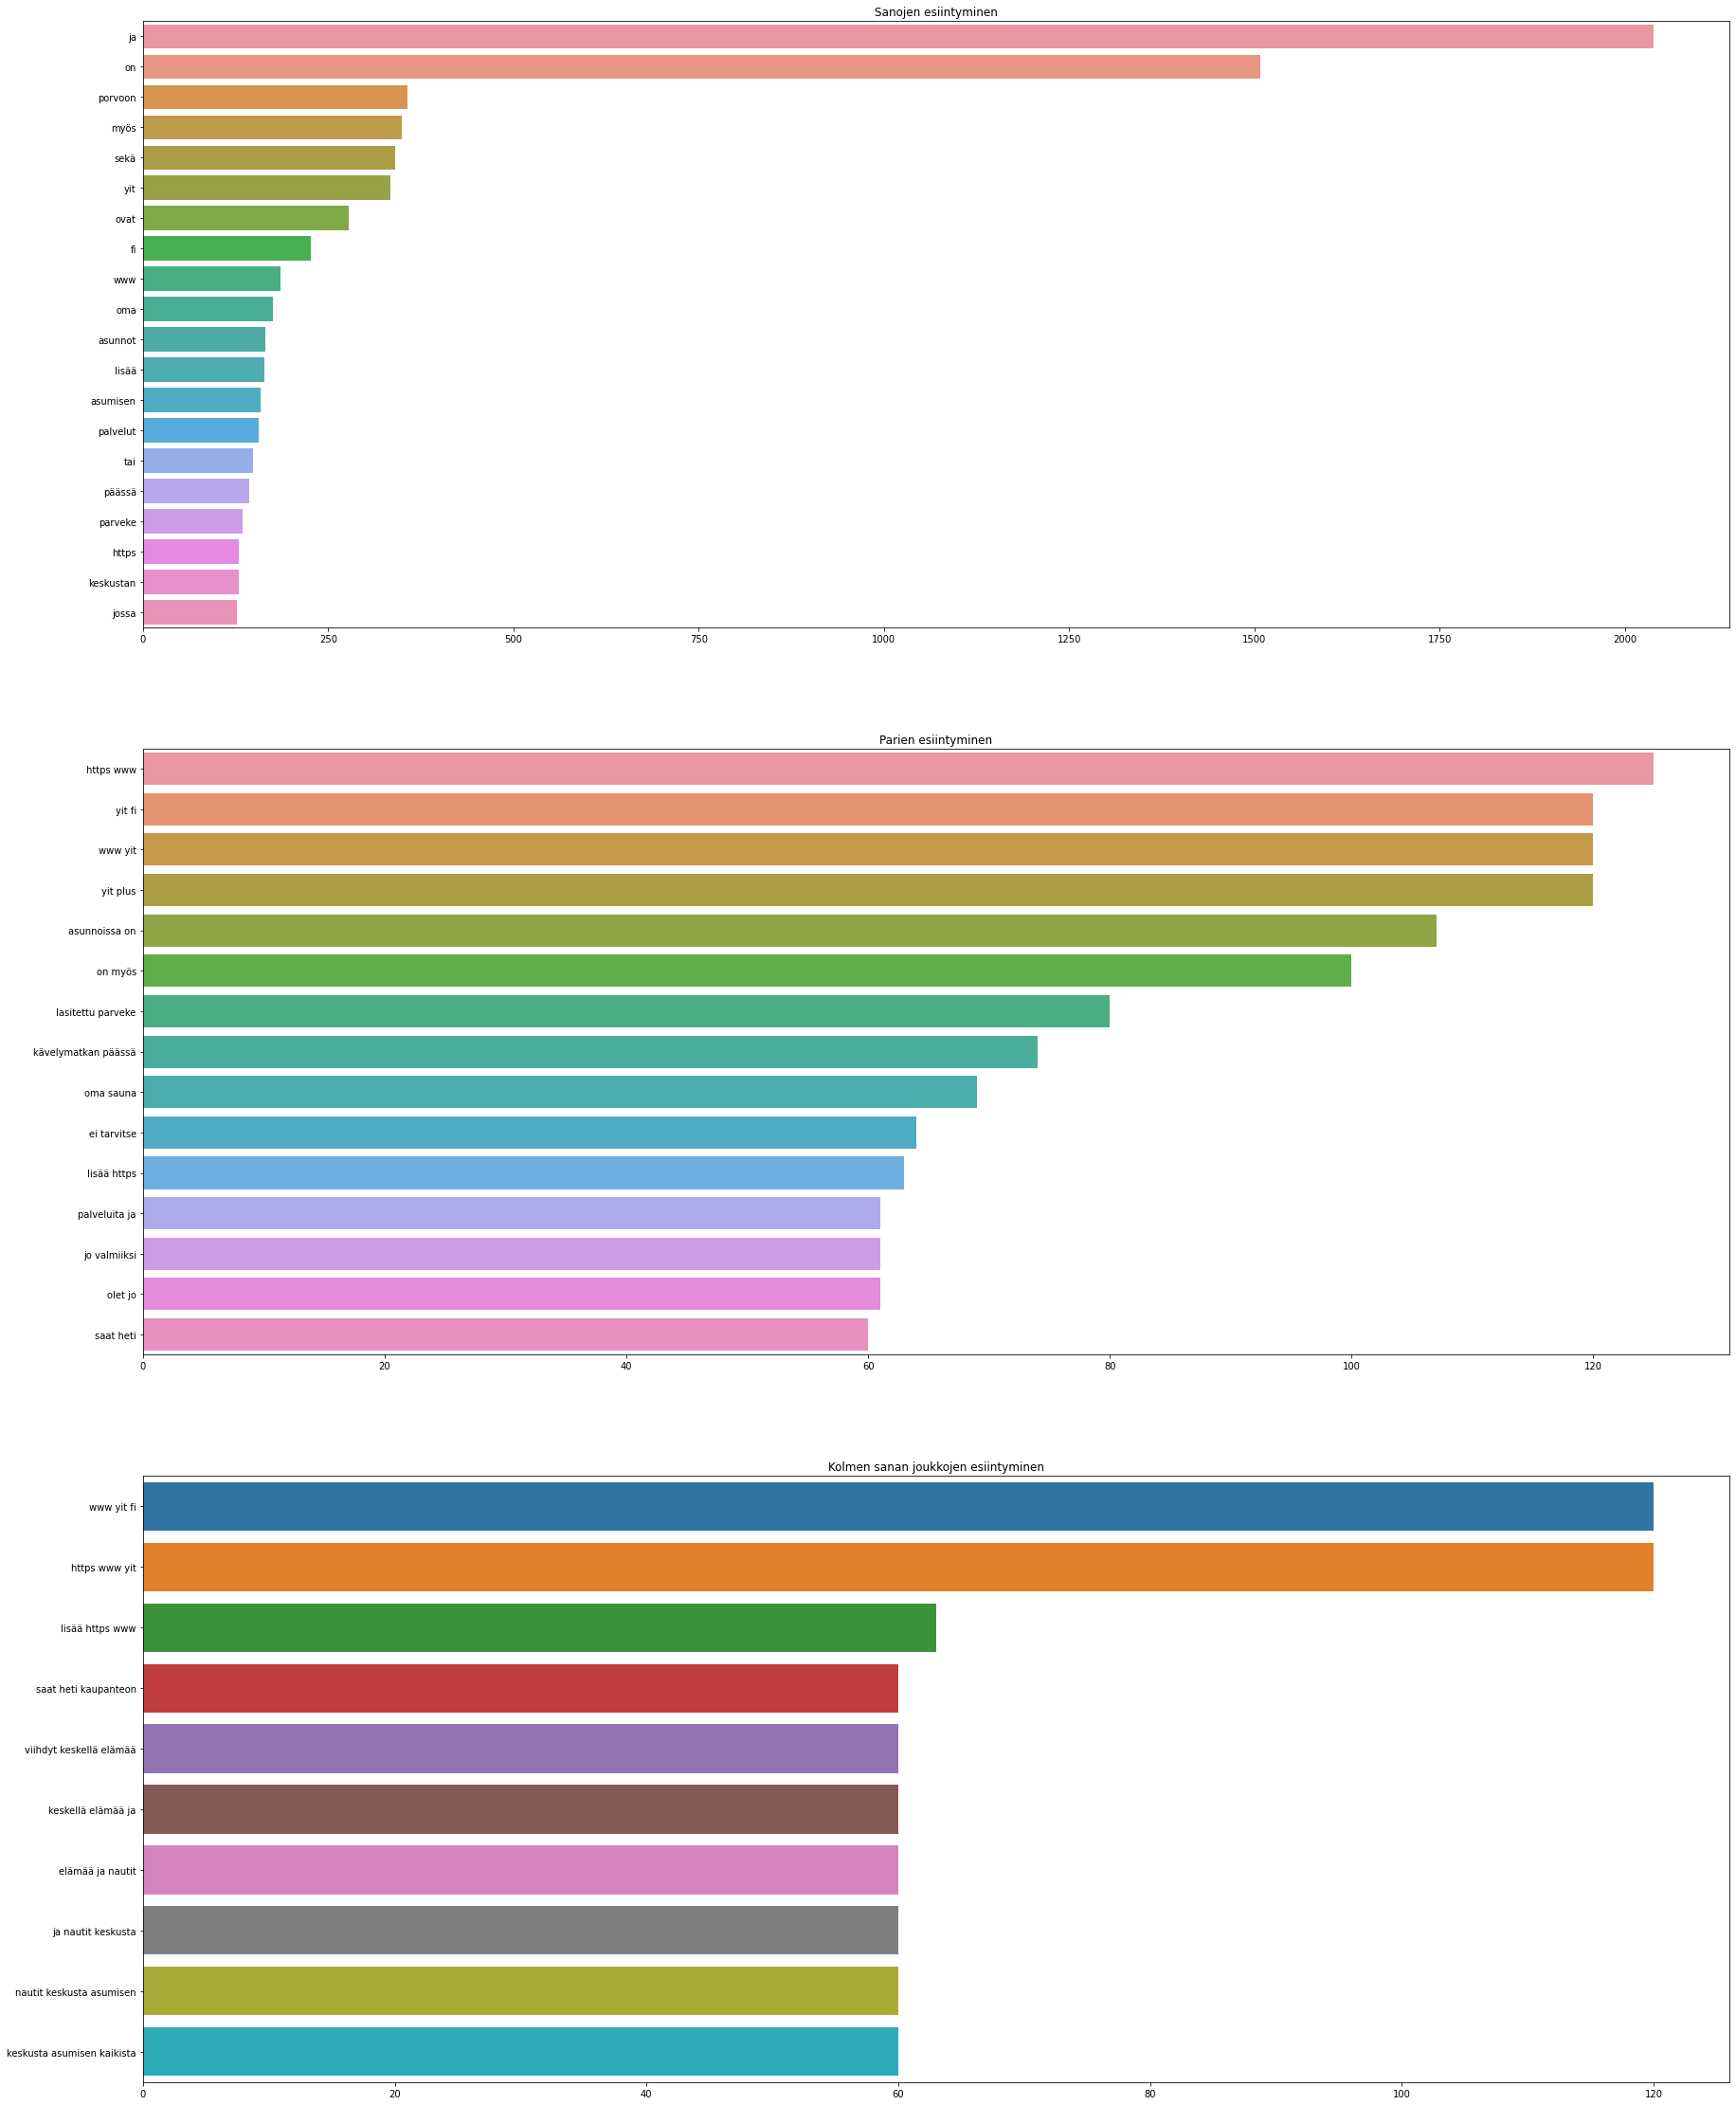

In [5]:
#Luo listan sanojen joukkoja
def generate_ngrams(s: str, n: int) -> list:
    s = s.lower()
    s = re.sub(r'[^a-zäöA-ZÄÖ0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

words = []
bigrams = []
trigrams = []
for kuvaus in df['Kuvaus']:
    words.extend(generate_ngrams(kuvaus, 1))
    bigrams.extend(generate_ngrams(kuvaus, 2))
    trigrams.extend(generate_ngrams(kuvaus, 3))
    
#Tallennetaan sanojen esiintymislukumäärät ja luodaan dataframe
words = collections.Counter(words)
word_series = pd.Series(words).sort_values(ascending=False).head(20)
word_df = word_series.to_frame()

bicounter = collections.Counter(bigrams)
bigram_series = pd.Series(bicounter).sort_values(ascending=False).head(15)
bigram_df = bigram_series.to_frame()


tricounter = collections.Counter(trigrams)
trigram_series = pd.Series(tricounter).sort_values(ascending=False).head(10)
trigram_df = trigram_series.to_frame()

fig, axes = plt.subplots(3, 1, figsize=(30,40))
sns.barplot(ax=axes[0], x = word_series.values, y= word_df.index, data=word_df).set_title('Sanojen esiintyminen')
sns.barplot(ax=axes[1], x = bigram_series.values, y= bigram_df.index, data=bigram_df).set_title('Parien esiintyminen')
sns.barplot(ax=axes[2], x = trigram_series.values, y= trigram_df.index, data=trigram_df).set_title('Kolmen sanan joukkojen esiintyminen')
plt.show()

Analysis of price per square meter

In [6]:
nelio_hinta = df[['Neliöhinta', 'Kaupunginosa']].dropna()
nelio_hinta.loc[nelio_hinta['Kaupunginosa'] == 'Kevätkumpu 1', 'Kaupunginosa'] = 'Kevätkumpu I'
nelio_hinta.loc[nelio_hinta['Kaupunginosa'] == 'Pääskynpelto', 'Kaupunginosa'] = 'Pääskypelto'
display(nelio_hinta['Kaupunginosa'].value_counts().head())
k_groups = nelio_hinta.groupby('Kaupunginosa')
means = k_groups.mean()
display(means.sort_values(by = 'Neliöhinta', ascending = False).head())
display(means.sort_values(by = 'Neliöhinta', ascending = True).head())

Keskusta       68
Länsiranta     39
Pääskypelto    22
Haikkoo        16
Tarkkinen      11
Name: Kaupunginosa, dtype: int64

,Neliöhinta
Kaupunginosa,
Tarkkinen,4919.503636
Keskusta,4559.141912
Länsiranta,4456.548718
Keskusta jokiranta,4219.650000
Pääskypelto,4196.654091


,Neliöhinta
Kaupunginosa,
Kerkkoo,1300.000000
Tarmola,1309.210000
Hamari,1355.035000
Eestinmäki,1858.173333
12 kaupunginosa,1914.890000


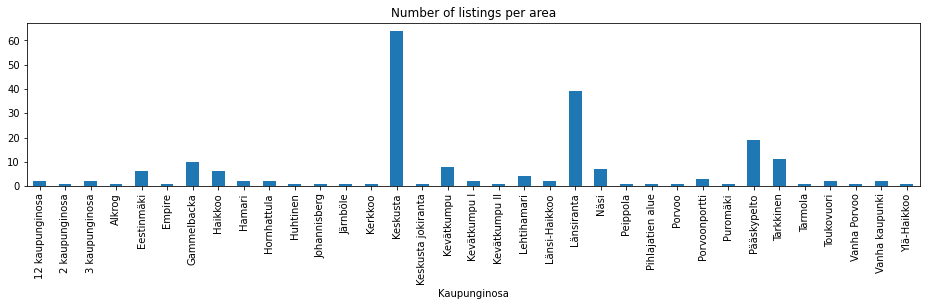

In [7]:
areas = nelio_hinta.groupby('Kaupunginosa')['Neliöhinta'].nunique().plot(kind='bar', figsize=(16,3), title = 'Number of listings per area')

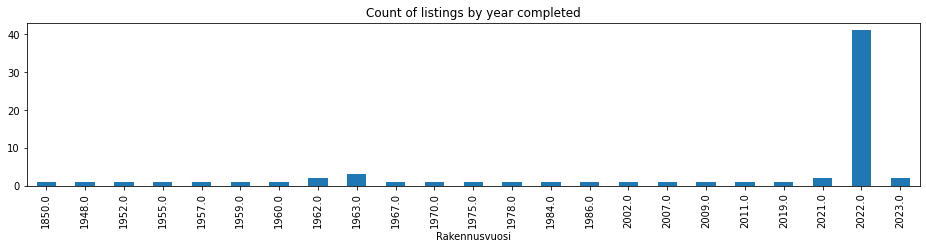

In [8]:
#Keskustassa paljon asuntoja listattuna. Rakennusvuoden tarkastelu antaa syyn.
keskustan_rakennusvuodet = df.loc[df['Kaupunginosa'] == 'Keskusta'].groupby('Rakennusvuosi').size().plot(kind='bar', figsize=(16,3), title = 'Count of listings by year completed')

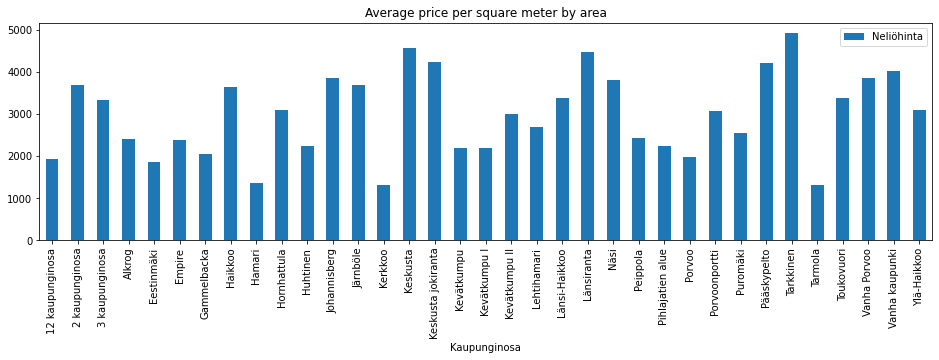

In [9]:
bar = means.plot(kind = 'bar', figsize=(16,4), title = 'Average price per square meter by area')

...